# DAV 6150 Module 3 Assignment

-by Group Manling Yang, Xiaojia He, Qi Sun

Here is a description of the assignment：

In this homework assignment, you will explore, analyze and model a data set containing information on approximately 12,000 commercially available wines. The variables are mostly related to the chemical properties of the wine being sold. The response variable is the number of sample cases of wine that were purchased by wine distribution companies after sampling a wine. These cases would be used to provide tasting samples to restaurants and wine stores around the United States. The more sample cases purchased, the more likely is a wine to be sold at a high end restaurant.

Below is a short description of the variables of interest in the data set:

INDEX - Identification variable (do not use) 
TARGET - Number of cases purchased 
AcidIndex - Proprietary method of testing total acidity of wine by using a weighted average Alcohol, Chloride, CitricAcid, Density, FixedAcidity, FreeSulfurDioxide
LabelAppeal - Marketing score indicating the appeal of label design for consumers. High numbers suggest customers like the label design. Negative numbers suggest customers don’t like the design
ResidualSugar - Residual sugar content of the wine
STARS - Wine rating by a team of experts. 4 stars = excellent, 1 star = poor 
Sulphates - Sulfate content of the wine
TotalSulfurDioxide - Total sulfur dioxide content of the wine
VolatileAcidity - Volatile acid content of the wine
pH - pH of the wine

We find that over 25% of wines were not rated by experts at all.

After that we find some other variables also contain some missing values, but not nearly as many.

<font color=blue|red|green|pink|yellow>Text</font> Now, let’s check the number of unique values per variable.

### Reference:
    
How to deal with missing values:https://machinelearningmastery.com/handle-missing-data-python/

Heatmap: https://seaborn.pydata.org/generated/seaborn.heatmap.html

5 Ways to Find Outliers in Your Data:https://statisticsbyjim.com/basics/outliers/

Create dummy variables: https://www.youtube.com/watch?time_continue=770&v=0s_1IsROgDc&feature=emb_logo

imputing missing values by modeling each feature : https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html



In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [190]:
# read data from github

df = pd.read_csv("https://raw.githubusercontent.com/XIAOJIA68/DAV-6150/master/M-DataSource/M3_Data.csv")
df.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [191]:
# Get the total obervations and attributes ogf the data

df.shape

(12795, 16)

In [192]:
# drop the first Index column which just represent the unique index of the data set and doesn't contain any data informaition

df = df.drop(["INDEX"], axis=1)
df.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


### Step2: Perform EDA:

In [175]:
# At first, print a summary of the data to better understand the details
df.describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


In [176]:
#to ensure that it is in a format that we can use to create a model. Most scikit-learn models require that our features be
#numeric (integer or float)

df.dtypes

TARGET                  int64
FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
Chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
Density               float64
pH                    float64
Sulphates             float64
Alcohol               float64
LabelAppeal             int64
AcidIndex               int64
STARS                 float64
dtype: object

### 1. Check all missing values

In [177]:
# check for all missing values

df.isnull().mean() * 100

TARGET                 0.000000
FixedAcidity           0.000000
VolatileAcidity        0.000000
CitricAcid             0.000000
ResidualSugar          4.814381
Chlorides              4.986323
FreeSulfurDioxide      5.056663
TotalSulfurDioxide     5.330207
Density                0.000000
pH                     3.087143
Sulphates              9.456819
Alcohol                5.103556
LabelAppeal            0.000000
AcidIndex              0.000000
STARS                 26.252442
dtype: float64

We find that over 25% of wines were not rated by experts at all.

After that we find seven other variables also contain some missing values which are below 10%, not nearly as many.

These big numbers may remind us to pay more attention to do the data prepartion before we start our model.

### 2. Show histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002082F6B06C8>,
      dtype=object)

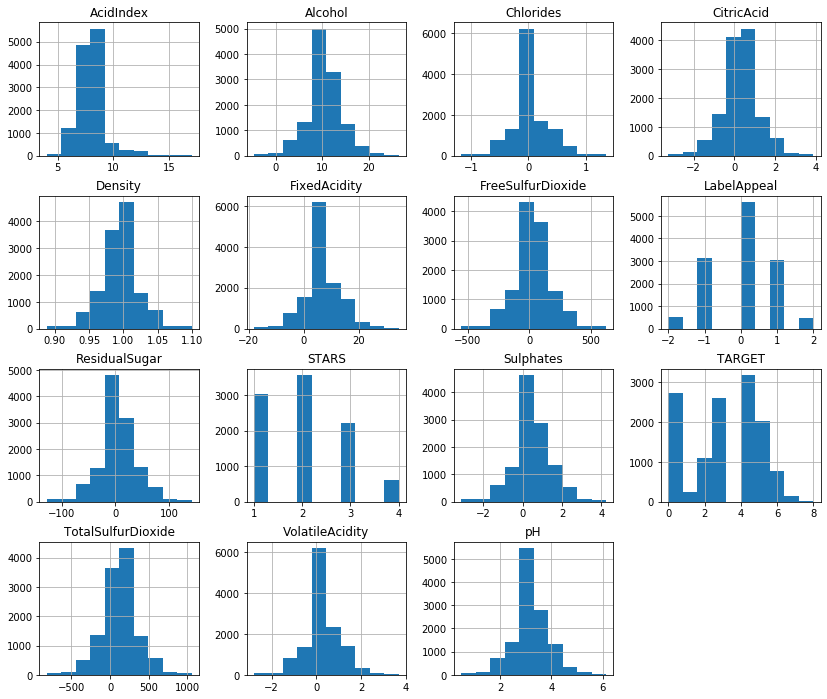

In [141]:
df.hist(figsize=(14,12))

From the histogram plots above, we can see that most of the histograms are nearly normal distribution except Ancidindex and STARS which is strongly right skew which means there may be many outliers. 

We get some values that are negative which do not make sense in many variables. For example, I may think the alcohol which represents the content of the wine component should only be positive. And the same as residual sugar,Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, Sulphates,AcidIndex and LabelAppeal. So there really should not be negative values. 

### Comparison some of variables

1. Fixed acidity： from the histogram, we can see that many of the Fixed acidity variables are more than 5g/L, and can reach to 10-30g/L which is quite higher. But even we consider it as the sum of all other acidity variables, it's still too high since other hightest acidity variables are only about 4g/L. 

2. Volatile acidity： US legal limit is at most 1.4 g/L (https://www.law.cornell.edu/cfr/text/27/4.21), or else the wine is considered “substandard”. We find nearly 1,000 wines with values higher than this, which seems like a lot.

3. pH: We should not be seeing many values with a pH below 2, as a pH of 2 is too low and equals vinegar (https://www.sciencebuddies.org/science-fair-projects/references/acids-bases-the-ph-scale). Yet, we see hundreds of wines with very low pHs, including over 50 with pH < 1 (more like battery or stomach acid).

### 3. Show the boxplot

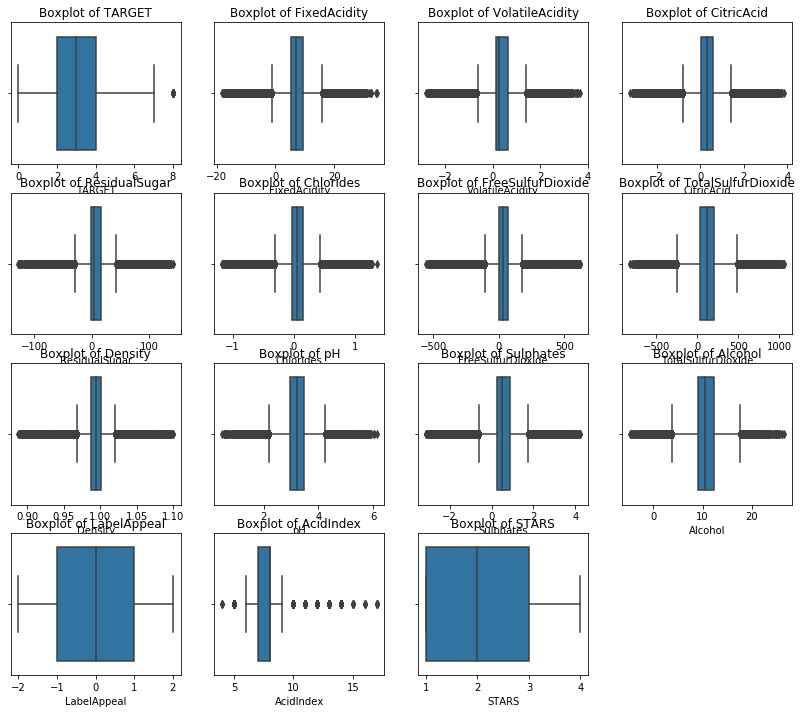

In [180]:
# use box plot to check if the data has outliers for each feature

plt.figure(figsize=(14,12))

#the boxplot of TARGET
plt.subplot(4,4,1)
sns.boxplot(x='TARGET', data=df)
# give the plot a title
plt.title('Boxplot of TARGET')
# x-axis label for a box plotdata 



#the boxplot of FixedAcidity
plt.subplot(442)
sns.boxplot(x='FixedAcidity', data=df)
# give the plot a title
plt.title('Boxplot of FixedAcidity')
# x-axis label for a box plotdata 



#the boxplot of VolatileAcidity
plt.subplot(443)
sns.boxplot(x='VolatileAcidity', data=df)
# give the plot a title
plt.title('Boxplot of VolatileAcidity')
# x-axis label for a box plotdata 



#the boxplot of CitricAcid
plt.subplot(444)
sns.boxplot(x='CitricAcid', data=df)
# give the plot a title
plt.title('Boxplot of CitricAcid')
# x-axis label for a box plotdata 



#the boxplot of ResidualSugar
plt.subplot(445)
sns.boxplot(x='ResidualSugar', data=df)
# give the plot a title
plt.title('Boxplot of ResidualSugar')
# x-axis label for a box plotdata 



#the boxplot of Chlorides
plt.subplot(446)
sns.boxplot(x='Chlorides', data=df)
# give the plot a title
plt.title('Boxplot of Chlorides')
# x-axis label for a box plotdata 




#the boxplot of FreeSulfurDioxide
plt.subplot(447)
sns.boxplot(x='FreeSulfurDioxide', data=df)
# give the plot a title
plt.title('Boxplot of FreeSulfurDioxide')
# x-axis label for a box plotdata 



#the boxplot of TotalSulfurDioxide
plt.subplot(448)
sns.boxplot(x='TotalSulfurDioxide', data=df)
# give the plot a title
plt.title('Boxplot of TotalSulfurDioxide')
# x-axis label for a box plotdata 



#the boxplot of Density
plt.subplot(449)
sns.boxplot(x='Density', data=df)
# give the plot a title
plt.title('Boxplot of Density')
# x-axis label for a box plotdata 



#the boxplot of pH
plt.subplot(4,4,10)
sns.boxplot(x='pH', data=df)
# give the plot a title
plt.title('Boxplot of pH')
# x-axis label for a box plotdata 



#the boxplot of Sulphates
plt.subplot(4,4,11)
sns.boxplot(x='Sulphates', data=df)
# give the plot a title
plt.title('Boxplot of Sulphates')
# x-axis label for a box plotdata 



#the boxplot of Alcohol
plt.subplot(4,4,12)
sns.boxplot(x='Alcohol', data=df)
# give the plot a title
plt.title('Boxplot of Alcohol')
# x-axis label for a box plotdata 



#the boxplot of LabelAppeal
plt.subplot(4,4,13)
sns.boxplot(x='LabelAppeal', data=df)
# give the plot a title
plt.title('Boxplot of LabelAppeal')
# x-axis label for a box plotdata 



#the boxplot of AcidIndex
plt.subplot(4,4,14)
sns.boxplot(x='AcidIndex', data=df)
# give the plot a title
plt.title('Boxplot of AcidIndex')
# x-axis label for a box plotdata 



#the boxplot of STARS
plt.subplot(4,4,15)
sns.boxplot(x='STARS', data=df)
# give the plot a title
plt.title('Boxplot of STARS')
# x-axis label for a box plotdata 


plt.show()

The boxplot above shows that except TARGET, LabelAppeal and STARS, most of the features
have large number of outliers which may strongly affect our dataset. We will deal with them later.

### 4. Show the heatmap

<function matplotlib.pyplot.show(*args, **kw)>

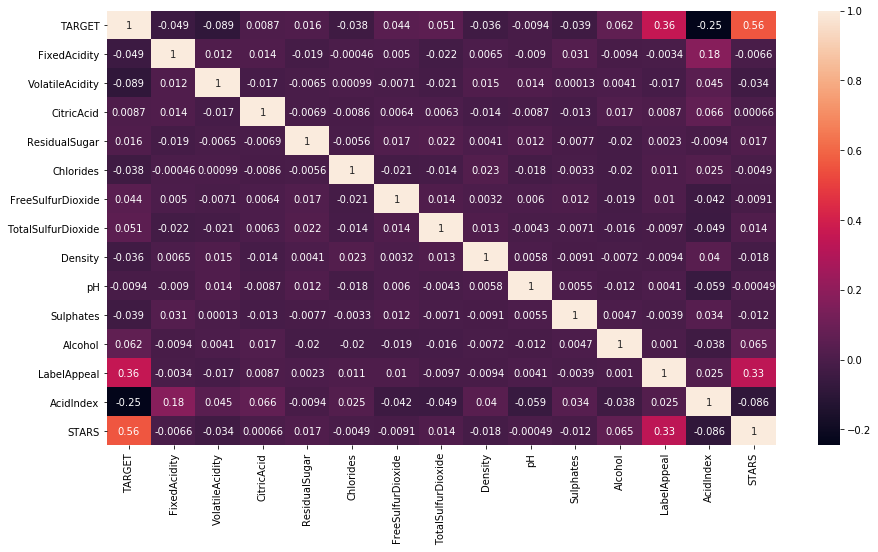

In [143]:
# get the correlation matrix for all the variables
CorrMatrix = df.corr()
CorrMatrix


# using the heatmap to show the relationship between our variables
plt.figure(figsize = (15,8))
sns.heatmap(CorrMatrix, annot = True, )
plt.show

form the plot we can see that the correlations between these variables do not obvious which means that they may not have too much influence on each other. And we can not use the linear regression to analyze them. 

Additionally, we find that the STARS and TARGET are highly relative which seems plausible, the higher star rate by experts the higher sales. we will discuss it later.

Thirdly, the LabelAppeal also has some correlation with the TARGET, and the coefficient is 0.36, not so strong.

### 5.Correlation of predictor variables with target

## Data clean

To visualize patterns in the missing data, I will use the missingno library. 
### missingno library: 
missingno library is useful for viewing contiguous areas of missing data, which would indicate that the missing data is not random

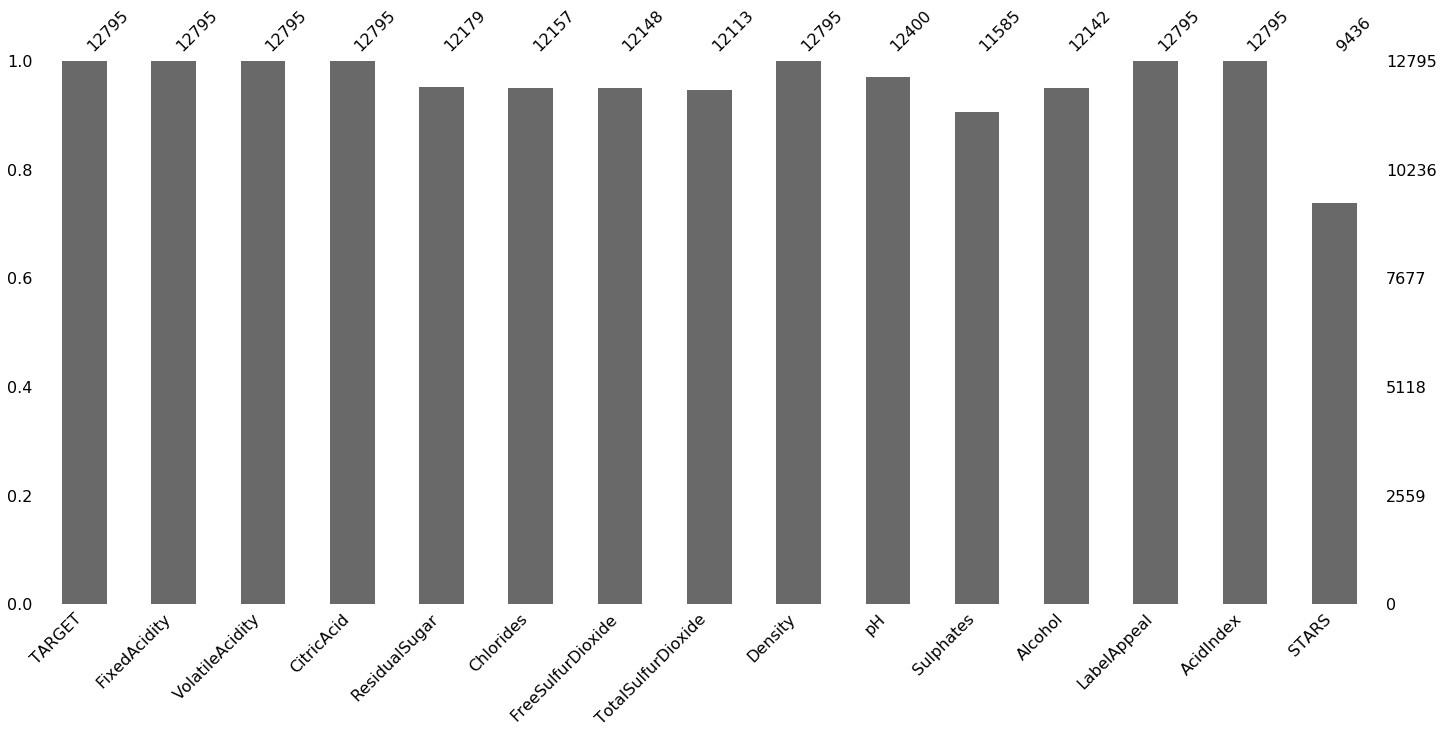

In [145]:
#use missingno library to create a plot to show the missing pattern
#import missingno 
import missingno as msno

ax = msno.bar(df)

From the missingno plot, we can clearly see the percentage and the number of missing values for each feature.

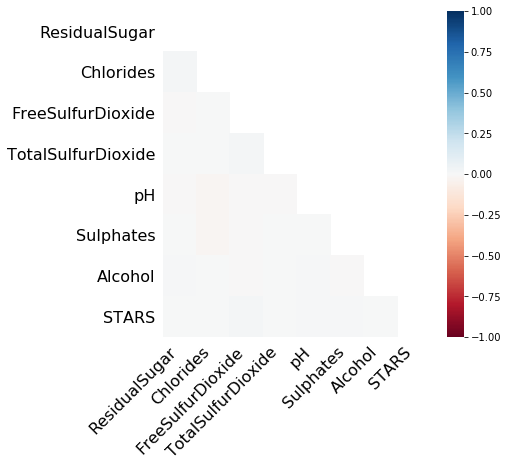

In [146]:
#create a heat map to show if there are correlations where data is missing

ax = msno.heatmap(df, figsize=(6, 6))

From the plot, we can see that these features where data are missing are not correlated

In [144]:
#  get percent of missing data:

df.isnull().mean() * 100

TARGET                 0.000000
FixedAcidity           0.000000
VolatileAcidity        0.000000
CitricAcid             0.000000
ResidualSugar          4.814381
Chlorides              4.986323
FreeSulfurDioxide      5.056663
TotalSulfurDioxide     5.330207
Density                0.000000
pH                     3.087143
Sulphates              9.456819
Alcohol                5.103556
LabelAppeal            0.000000
AcidIndex              0.000000
STARS                 26.252442
dtype: float64

In [147]:

drop column FreeSulfurDioxide since we have the TotalSulfurDioxide which can help us to see the influence of SulfurDioxide to our target.  
use median to impute the TotalSulfurDioxide missing value
PH: use median to impute the PH; add dommy variables to PH column, when PH is more than 3 we assign 1, PH less than 3 we assign 0

use the mean to fill the Alcohol   

SyntaxError: invalid syntax (<ipython-input-147-16e0c534098f>, line 1)

#### 1. drop rows of the ResidualSugar, Chlorides which contain null values. since these missing value rows are small, they only make up 4% ogf the data, we can drop them

In [184]:
df1 =df[df['ResidualSugar'] != "NaN"]
df1


df2 =df1[df1['Chlorides'] != "NaN"]
df2.head()


C:\Users\kelly\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


#### 2. drop column FreeSulfurDioxide 

In [185]:
# drop column FreeSulfurDioxide since we have the TotalSulfurDioxide which can help us to see the influence of SulfurDioxide to our target.  
#use median to impute the TotalSulfurDioxide missing value

df3 = df2.drop(columns="FreeSulfurDioxide")
df3.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.160,-0.98,54.2,-0.567,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,3,4.5,0.160,-0.81,26.1,-0.425,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,5,7.1,2.640,-0.88,14.8,0.037,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5.7,0.385,0.04,18.8,-0.425,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,8.0,0.330,-1.26,9.4,NaN,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [ ]:
# get the Alcohol value which is more than 0, since the Alcohol can not be negative in the wine

df5 = df4[df4['Alcohol'] >= 0]
df5

#### 3. Transfer the negative number to positive:

In [149]:
#Transfer the negative number to positive:

#at frist, to get the minimum value of the features.

min_TARGET = min(df['TARGET'])
print(min_TARGET)
min_FixedAcidity = min(df['FixedAcidity'])
print(min_FixedAcidity)
min_VolatileAcidity = min(df['VolatileAcidity'])
print(min_VolatileAcidity)
min_CitricAcid = min(df['CitricAcid'])
print(min_CitricAcid)
min_ResidualSugar = min(df['ResidualSugar'])
print(min_ResidualSugar)
min_Chlorides = min(df['Chlorides'])
print(min_Chlorides)
min_FreeSulfurDioxide = min(df['FreeSulfurDioxide'])
print(min_FreeSulfurDioxide)
min_TotalSulfurDioxide = min(df['TotalSulfurDioxide'])
print(min_TotalSulfurDioxide)
min_Density = min(df['Density'])
print(min_Density)
min_pH = min(df['pH'])
print(min_pH)
min_Sulphates = min(df['Sulphates'])
print(min_Sulphates)
min_Alcohol = min(df['Alcohol'])
print(min_Alcohol)
min_LabelAppeal = min(df['LabelAppeal'])
print(min_LabelAppeal)
min_AcidIndex = min(df['AcidIndex'])
print(min_AcidIndex)
min_STARS = min(df['STARS'])
print(min_STARS)

0
-18.1
-2.79
-3.24
-127.8
-1.171
nan
-823.0
0.8880899999999999
0.48
-3.13
-4.7
-2
4
1.0


In [150]:
# use The Box-Cox approach seeks to  transfer negative values
#find the minimum value of the variable, then add its inverse + 1 to __all__ values within the variable


df['FixedAcidity'] = df['FixedAcidity'] - min(df['FixedAcidity']) + 1

df['VolatileAcidity'] = df['VolatileAcidity'] - min(df['VolatileAcidity']) +1

df['CitricAcid'] = df['CitricAcid'] - min(df['CitricAcid']) +1

df['ResidualSugar'] = df['ResidualSugar'] - min(df['ResidualSugar']) +1

df['Chlorides'] = df['Chlorides'] - min(df['Chlorides'])+ 1

df['FreeSulfurDioxide'] = df['FreeSulfurDioxide'] - min(df['FreeSulfurDioxide']) +1

df['TotalSulfurDioxide'] = df['TotalSulfurDioxide'] - min(df['TotalSulfurDioxide']) + 1

df['Sulphates'] = df['Sulphates'] - min(df['Sulphates']) + 1

df['Alcohol'] = df['Alcohol'] - min(df['Alcohol']) + 1

df['LabelAppeal'] = df['LabelAppeal'] - min(df['LabelAppeal']) +1
df

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,22.3,4.950,3.26,183.0,1.604,NaN,1092.0,0.99280,3.33,3.54,15.6,3,8,2.0
1,3,23.6,3.950,3.43,154.9,1.746,NaN,497.0,1.02792,3.38,4.83,NaN,2,7,3.0
2,5,26.2,6.430,3.36,143.6,2.208,NaN,966.0,0.99518,3.12,4.61,27.7,2,8,3.0
3,3,24.8,4.175,4.28,147.6,1.746,NaN,939.0,0.99640,2.24,5.96,11.9,2,6,1.0
4,4,27.1,4.120,2.98,138.2,NaN,NaN,932.0,0.99457,3.12,5.90,19.4,3,9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,0,24.1,3.000,6.25,133.8,2.214,NaN,925.0,1.01077,3.39,4.70,10.6,4,5,NaN
12791,5,28.0,4.260,4.53,213.7,2.430,NaN,NaN,0.99518,4.46,2.93,NaN,2,8,2.0
12792,4,25.1,3.960,3.14,165.8,2.249,NaN,932.0,0.99076,3.25,NaN,18.0,3,6,2.0
12793,3,26.8,4.110,4.36,NaN,2.200,NaN,1098.0,0.99060,3.97,4.75,16.7,2,6,2.0


### 5. delete outliers

### 6. Impute data

__SimpleImputer pre-processing__:The scikit-learn library provides the SimpleImputer pre-processing class that can be used to replace missing values.

It is a flexible class that allows you to specify the value to replace (it can be something other than NaN) and the technique used to replace it (such as mean, median, or mode). The SimpleImputer class operates directly on the NumPy array instead of the DataFrame.

In [193]:
#use the implement Box-Cox transforms via the __sklearn.preprocessing.power_transform()__ function 
# automatically test the full range of potential exponent values to identify the transform 
#that minimizes the standard deviation of the data.

from sklearn.preprocessing import power_transform

df.drop(columns="FreeSulfurDioxide")
df_tran = power_transform(df, method='yeo-johnson')
df_tran

array([[-0.02290964, -0.64980345,  1.06969118, ...,  0.01178501,
         0.36430044,  0.11015131],
       [-0.02290964, -0.44432945, -0.2196051 , ..., -1.11262179,
        -0.54726199,  1.06780422],
       [ 1.02670485, -0.02564391,  3.02005409, ..., -1.11262179,
         0.36430044,  1.06780422],
       ...,
       [ 0.50043727, -0.20386454, -0.20688118, ...,  0.01178501,
        -1.79310396,  0.11015131],
       [-0.02290964,  0.07215005, -0.01553279, ..., -1.11262179,
        -1.79310396,  0.11015131],
       [ 0.50043727, -0.33251438, -0.47313687, ...,  0.01178501,
        -0.54726199,  0.11015131]])

In [194]:
# imputing missing values using scikit-learn

from numpy import nan
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer


# retrieve the numpy array
values = df.values
# define the imputer
imputer = SimpleImputer(missing_values=nan, strategy='median')
# transform the dataset
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print('Missing: %d' % isnan(transformed_values).sum())

Missing: 0


In [199]:
# transfer the array to dataframe

tran_df = pd.DataFrame(transformed_values)  


tran_df.columns = ['TARGET','FixedAcidity','VolatileAcidity',
                     'CitricAcid','ResidualSugar','Chlorides','FreeSulfurDioxide','TotalSulfurDioxide','Density',
                    'pH','Sulphates','Alcohol','LabelAppeal','AcidIndex','STARS']
tran_df.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3.0,3.2,1.160,-0.98,54.2,-0.567,30.0,268.0,0.99280,3.33,-0.59,9.9,0.0,8.0,2.0
1,3.0,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,10.4,-1.0,7.0,3.0
2,5.0,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1.0,8.0,3.0
3,3.0,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1.0,6.0,1.0
4,4.0,8.0,0.330,-1.26,9.4,0.046,-167.0,108.0,0.99457,3.12,1.77,13.7,0.0,9.0,2.0


#### 7. create dummy variables for the STARS and AcidIndex

(array([3359.,    0., 3042.,    0.,    0., 3570.,    0., 2212.,    0.,
         612.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

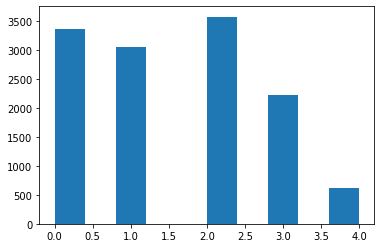

In [201]:
# replace NaN in the STARS column to zero
df["STARS"] = df["STARS"].fillna(0)


plt.hist(df['STARS'])

In [204]:
# check the values in the STARS column
df.STARS.value_counts()


2.0    3570
0.0    3359
1.0    3042
3.0    2212
4.0     612
Name: STARS, dtype: int64

In [207]:
# create dummy variables for the STARS with only 3 levels, where 0 = not given, 
#1 = 1-star review, and 2 = 2+ star review.

df['STARS_du'] = df.STARS.map({0:0,1:1,2:2,3:2,4:2})
df.head()

pd.get_dummies(df, columns=['STARS',''])

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS,STARS_du
0,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0,2
1,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0,2
2,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0,2
3,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0,1
4,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0,2


In [ ]:
# create an additional variable for AcidIndex with levels 1 for <= 8, 2 for 9, 3 for 10, and 4 for 11+.
# Also treat 4 the same as 5, and >12 the same as 12.





array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020831500308>,
      dtype=object)

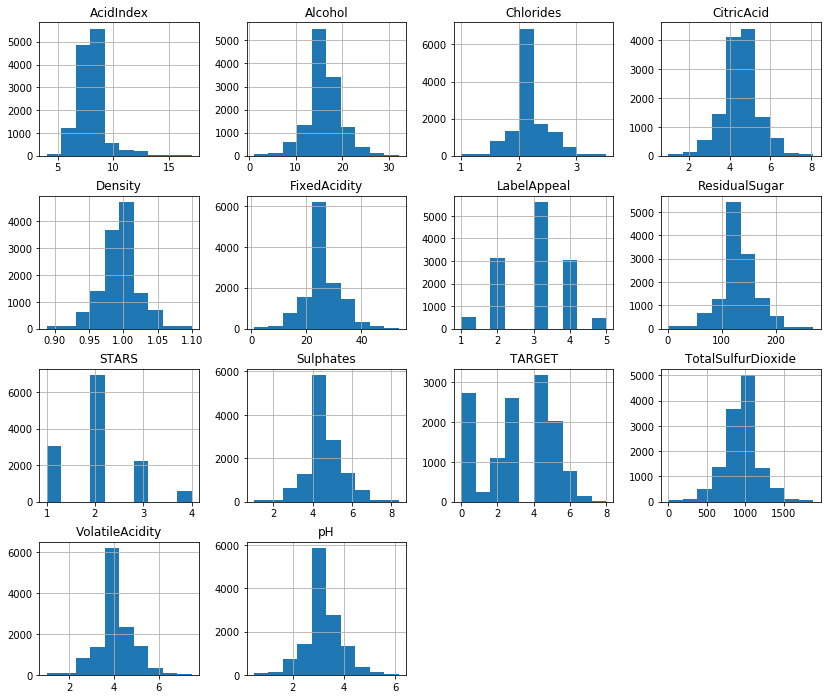

In [169]:
tran_df.hist(figsize=(14,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002082FF9C588>,
      dtype=object)

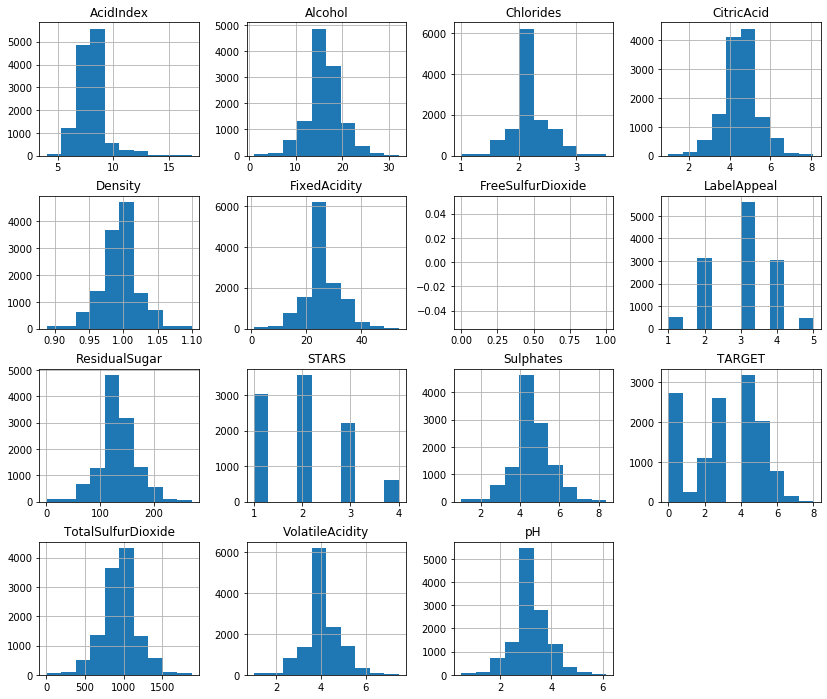

In [151]:
df.hist(figsize=(14,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002082CE773C8>,
      dtype=object)

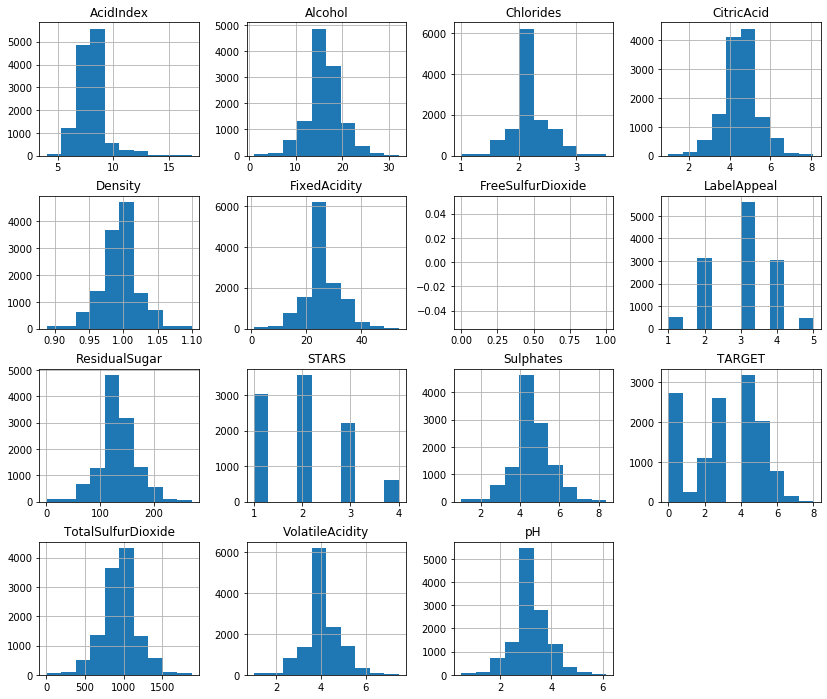

In [170]:
df.hist(figsize=(14,12))

__Box-Cox Transforms__：The Box-Cox approach seeks to identify an appropriate exponent (Lambda) to use to transform the distribution of a numeric variable into a more Gaussian distribution. Box-Cox generally requires that all data values within the variable be __positive__. This limitation can be overcome by simply adding a fixed constant to every value within the variable to ensure that each is greater than zero (e.g., if the variable contains negative values, find the minimum value of the variable, then add its inverse + 1 to __all__ values within the variable